In [1]:
#STEP 1 - Data Pre-processing

#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing dataset
dataset = pd.read_csv(r"C:\Users\aakas\OneDrive\Desktop\AAKASH GORADIA\AAKASH GORADIA'S DRIVE\CAREER\COURSES\A-Z Machine Learning\MyNotebooks\Machine-Learning\Part2 - Regression\Polynomial Regression\Position_Salaries.csv")

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
#independent variable matrix

# X = dataset.iloc[:, 1].values
X = dataset.iloc[:, 1:2].values
#We write this way bcoz we want X to be a matrix not a vector

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
#dependent variable matrix
Y = dataset.iloc[:, 2].values

In [7]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [8]:
#we cannot split into training and test sets here as the observations are less to perform a accurate prediction.

In [9]:
#STEP 2 : Fitting the model onto data set

#A - Fitting Linear Regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [10]:
lin_reg.fit(X, Y)

LinearRegression()

In [11]:
#B - Fitting Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)

In [12]:
#fitting X into x_poly to get polynomial features (squares)
x_poly = poly_reg.fit_transform(X)

In [13]:
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [14]:
#including this polynomial fit into our multiple linear regression model
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, Y)

LinearRegression()

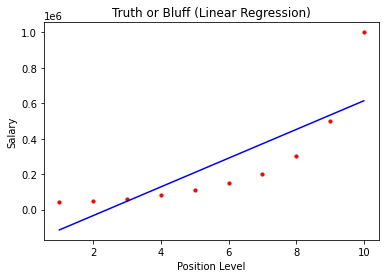

In [15]:
#STEP 3 : Visualizing the Results

#A. Visializing the Linear Regression Results

plt.scatter(X, Y, color = 'red', s = 10)
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

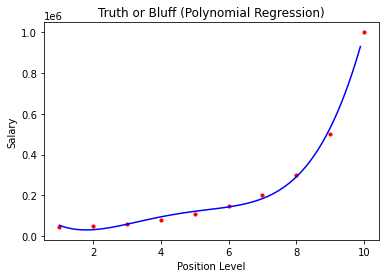

In [16]:
#not so great predictions from the Simple Linear Regression model

#B. Visializing the Linear Regression Results
x_grid = np.arange(min(X), max(X), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(X, Y, color = 'red', s = 10)
plt.plot(x_grid, lin_reg2.predict(poly_reg.fit_transform(x_grid)), color = 'blue')
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [20]:
#STEP 4 : Predicting a new reult

#A. Predicting with Linear Regression

lin_reg.predict([[6.5]])

array([330378.78787879])

In [21]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])